In [798]:
import pandas as pd
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from src.preprocessing import read_chat_file_pauses_to_dict, chat_count_dict_to_df
from src.classifier import split_train_test, fit_classifier, predict, eval_clf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [799]:

def read_data() -> pd.DataFrame:
    """
    Read the all the files.
    """
    # Dementia
    directory_path = "./chat_files/dementia/cookie"
    chat_file_pauses_dict = read_chat_file_pauses_to_dict(directory_path, filter_by_participant="PAR", label=1)
    df_dementia = chat_count_dict_to_df(chat_file_pauses_dict)

    # Control
    directory_path = "./chat_files/control/cookie"
    chat_file_pauses_dict = read_chat_file_pauses_to_dict(directory_path, filter_by_participant="PAR", label=0)
    df_control = chat_count_dict_to_df(chat_file_pauses_dict)

    # Concat dataframes
    df = pd.concat([df_dementia, df_control]).sort_values("file_path").reset_index(drop=True)

    # apply normalization techniques
    # change when using other feature combinations
    cols_to_norm = ["(.)","(..)", "(...)" ,"&"]
    scaler = MinMaxScaler()
    df[cols_to_norm] = scaler.fit_transform(df[cols_to_norm])

    return df


def traintest(df):
    # change when using other feature combinations
    X = df[["(.)","(..)", "(...)" ,"&"]]
    y = df["label"]
    return split_train_test(X=X, y=y, test_size=0.2, random_state=42)


def dummy_classifier(df):
    """
    Make predictions that ignore the input features
    """
    X_train, X_test, y_train, y_test = traintest(df)

    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X_train, y_train)

    return dummy_clf.score(X_test, y_test)


def evaluate_classifier(df: pd.DataFrame, clf: Pipeline) -> dict:
    """
    Evaluate a classifier.
    """
    X_train, X_test, y_train, y_test = traintest(df)

    trained_clf = fit_classifier(clf, X_train, y_train)
    y_pred = predict(trained_clf, X_test)
    eval_scores = eval_clf(y_test, y_pred)
    return eval_scores, y_test, y_pred
    


In [802]:
def evaluate_model(df, clf):
    predicted_targets = np.array([])
    actual_targets = np.array([])
    eval_scores, y_test, predicted_labels = evaluate_classifier(df, clf)
    predicted_targets = np.append(predicted_targets, predicted_labels)
        
    actual_targets = np.append(actual_targets, y_test)

    return predicted_targets, actual_targets

{'f1_score': 0.4615384615384615, 'accuracy_score': 0.5545454545454546, 'precision_score': 0.6774193548387096, 'recall_score': 0.35} 



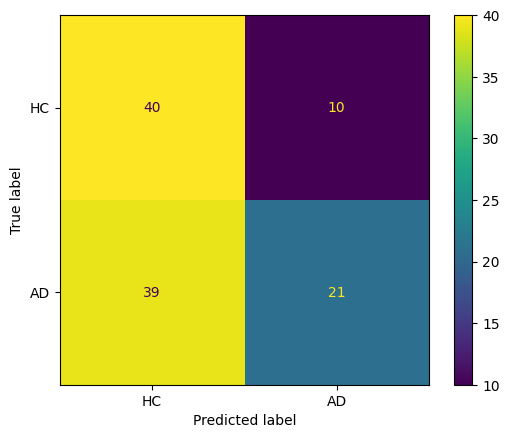

Predicted: 
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 

Actual: 
 [0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1.]


In [805]:
df = read_data()
# change to KNeighborsClassifier() or SVC() when using the other models
clf = GaussianNB()

# confusion matrix 
predicted, actual = evaluate_model(df, clf)
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=['HC','AD'])

eval_scores, y_test, y_pred = evaluate_classifier(df, clf)
# print f1-score, accuracy, precision, recall
print(eval_scores, "\n")

# show confusion matrix
cm_display.plot()
plt.show()

# print labels predicted by model and true labels
print("Predicted: \n", predicted, "\n")
print("Actual: \n", actual)